In [90]:
from time import localtime

def time_show():
    return str(localtime()[3]) + 'h' + str(localtime()[4])

In [1]:
def Delta(X, n=-1):
    if n == -1:
        n = max(X)
    return Polyhedron(vertices=[[int(i == j) for i in range(n)] for j in X])

def hypergraphic_polytope(HH, n = -1):
    if n == -1:
        n = max(max(X) for X in HH)
    return sum(Delta(X, n) for X in HH)


def hypergraphic_polytope_verbose(HH, n = -1):
    if n == -1:
        n = max(max(X) for X in HH)
    P = Delta(HH[0], n)
    for i in range(1, len(HH)):
        print(time_show(), "step", i, "over", len(HH)-1)
        P += Delta(HH[i], n)
    return P


def all_hypergraphs(n, style = "all", k = None):
    if "all" in style: # all hypergraphs
        SS = [X for X in Subsets(range(n)) if len(X) != 0]
        for HH in Subsets(SS):
            yield HH
    if "no" in style: # all hypergraphs without singletons
        SS = [X for X in Subsets(range(n)) if len(X) >= 2]
        for HH in Subsets(SS):
            yield HH
    if "unif" in style: # all uniform hypergraphs (if `k` is given, then all k-uniform)
        if k == None:
            yield Set()
            for j in range(n):
                for HH in Subsets(Subsets(range(n), j)):
                    if len(HH) > 0:
                        yield HH
        else:
            for HH in Subsets(Subsets(range(n), k)):
                if len(HH) > 0:
                    yield HH
    if "interval" in style: # all interval hypergraphs
        for SS in Subsets(Subsets(range(n), 2)):
            yield Set([Set(range(S[0], S[1]+1)) for S in SS])
    if "interval_with_singletons" in style: # all interval hypergraphs
        for SS in Subsets([(i, j) for i in range(n) for j in range(i, n)]):
            yield Set([Set(range(S[0], S[1]+1)) for S in SS])
    if "building" in style: # NOT CODED YET, all building sets
        return None

In [93]:
def is_unimodal(L):
    ind = L.index(max(L))
    return all(L[k] <= L[k+1] for k in range(ind-1)) and all(L[k] >= L[k+1] for k in range(ind, len(L)-1))

def is_log_concave(L):
    return all(L[i]^2 >= L[i-1]*L[i+1] for i in range(1, len(L)-1))

def is_semi_ultra_log_concave(L):
    m = len(L)
    return all(i * L[i]^2 >= (i+1) * L[i-1]*L[i+1] for i in range(1, len(L)-1))

def is_ultra_log_concave(L):
    m = len(L)
    return all(i * (m-i) * L[i]^2 >= (i+1) * (m-i+1) * L[i-1]*L[i+1] for i in range(1, len(L)-1))

def remove_zeros(L):
    M = []
    for l in L:
        if not l == 0:
            M.append(l)
    return M

In [2]:
def random_hypergraph_Erdos_Renyi(n, p = 1/2, style = "all", k = None):
    from random import random, randint
    
    if "all" in style: # random using all hyper-arcs
        HH = []
        for X in Subsets(range(n)):
            if random() <= p:
                HH.append(X)
        return Set(HH)
    if "no" in style: # random using all hyper-arcs, except singletons
        HH = []
        for X in Subsets(range(n)):
            if len(X) >= 2:
                if random() <= p:
                    HH.append(X)
        return Set(HH)
    if "unif" in style: # random using hyper-arcs of size k (if k not given, then chosen random)
        if k == None:
            j = randint(0, n)
        else:
            j = k
        HH = []
        for X in Subsets(range(n), j):
            if random() <= p:
                HH.append(X)
        return Set(HH)
    if "interval" in style: # random using interval for hyper-arcs
        HH = []
        for X in Subsets(range(n), 2):
            if random() <= p:
                HH.append(Set(range(min(X), max(X)+1)))
        return Set(HH)

In [3]:
def is_interval_hypergraph(HH):
    return all(set(H) == set(range(min(H), max(H)+1)) for H in HH)

def normal_form_interval_hypergraph(HH):
    if not is_interval_hypergraph(HH):
        return HH
    L = list(HH)
    L.sort(key=lambda x : (len(x), min(x), max(x)))
    return L

def draw_interval_hypergraph(HH, n = -1, style = "fixed"):
    step = 0.1
    if n == -1:
        n = max(max(H) for H in HH) + 1
    Q = point((0, 0), color = 'blue')
    if style == "fixed":
        L = list(HH)
    else:
        L = normal_form_interval_hypergraph(HH)
        co = 0
    for I in L:
        a, b = min(I), max(I)
        #print(a, b)
        if style == "fixed":
            x = step * ( (b-a+1) * (b-a) /2 - 1 + (a%(b-a+1)) )
        else:
            x = step *  co
            co += 1
        Q += line(((a, x), (b, x)), color = 'red')
    Q += sum(point((i, 0), color = 'blue') for i in range(n))
    return Q

def latex_interval_hypergraph(HH, n = -1, style = "fixed"):
    step = 0.1
    if n == -1:
        n = max(max(H) for H in HH) + 1
    s = r"\begin{tikzpicture}" + '\n'
    if style == "fixed":
        L = list(HH)
    else:
        L = normal_form_interval_hypergraph(HH)
        co = 0
    for I in L:
        a, b = min(I), max(I)
        #print(a, b)
        if style == "fixed":
            x = step * ( (b-a+1) * (b-a) /2 - 1 + (a%(b-a+1)) )
        else:
            x = step *  co
            co += 1
        s += r"\draw[red] ("+str(a)+r", "+str(round(x,1))+r") -- ("+str(b)+r", "+str(round(x,1))+r");" + '\n'
    s += '\n'
    for i in range(n):
        s += r"\draw[blue] ("+str(i)+r", 0) node{\begin{scriptsize}"+str(i+1)+r"\end{scriptsize}};" + '\n'
    s += r"\end{tikzpicture} \hfill" + '\n'
    return s

def to_intervals(HH):
    H = [(min(X), max(X)) for X in HH]
    H.sort()
    return H

def Vincent_criterion(HH):
    H = to_intervals(HH)
    #print(H)
    for i in range(len(H)):
        for j in range(i+1, len(H)):
            a, b = H[i]
            c, d = H[j]
            #print(a, b, c, d)
            if b < d and a != c:
                #print('test 1')
                if b - c + 1 >= 2:
                    #print('test 2')
                    if not any(a <= K[0] and K[0] <= c and b <= K[1] and K[1] <= d and K != (a, b) and K != (c, d) for K in H):
                        #print('test 3')
                        return False
                if b - c + 1 >= 1 and any(K[0] <= a and d <= K[1] for K in H):
                    #print('test 4')
                    if not (a, d) in H:
                        #print('test 5')
                        return False
    return True

In [4]:
def split3(Y):
    yield Set(range(Y)), Set(), Set()
    for i in range(Y):
        for j in range(i, Y):
            for A in Subsets(range(i, j+1)):
                yield Set([p for p in range(i)] + [p for p in range(j+1, Y)]), Set([p for p in range(i, j+1) if not p in A]),  Set([p for p in range(i, j+1) if p in A])
    return None

def split2(Y):
    for i in range(Y):
        j = Y-1
        for A in Subsets(range(i, j+1)):
            yield Set([p for p in range(i)] + [p for p in range(j+1, Y)]), Set([p for p in range(i, j+1) if not p in A]),  Set([p for p in range(i, j+1) if p in A])
    return None

def split3_old(Y):
    for A in Subsets(Y):
        for B in Subsets(Set(Y).difference(A)):
            yield A, B, Set(Y).difference(A).difference(B)
    return None

def hypergraphs_that_reduce_to(H, m):
    X = []
    k = len(H)-1
    while k >= 0 and H[k][1] == m:
        X.append((tuple(H[k])))
        k -= 1
    if len(X) == 0:
        yield H
        yield H + [(m+1, m+1)]
        return None
    #print(H, m, X)
    X.sort()
    if X[-1] == (m, m):
        for down, up, downup in split2(len(X)):
            #print(H, n, H[:k+1], X)
            yield H[:k+1] + [X[q] for q in down.union(downup)] + [(X[q][0], m+1) for q in up.union(downup)]
            yield H[:k+1] + [X[q] for q in down.union(downup)] + [(X[q][0], m+1) for q in up.union(downup)] + [(m+1, m+1)]
    else:
        for down, up, downup in split3(len(X)):
            #print(H, n, H[:k+1], X)
            yield H[:k+1] + [X[q] for q in down.union(downup)] + [(X[q][0], m+1) for q in up.union(downup)]
            yield H[:k+1] + [X[q] for q in down.union(downup)] + [(X[q][0], m+1) for q in up.union(downup)] + [(m+1, m+1)]
    return None

def all_simple_interval_recursive(n, verbose=False):
    front = [([], 1), ([(1, 1)], 1)]
    while len(front) > 0:
        #print(front)
        H, N = front.pop(-1)
        for J in hypergraphs_that_reduce_to(H, N):
            #print(H, N, J)
            if Vincent_criterion(J):
                if N+1 == n:
                    #yield J
                    if all(h[0] != h[1] for h in J):
                        if verbose:
                            yield J, len(front)
                        else:
                            yield J
                else:
                    front.append(([tuple(t) for t in J], N+1))
    return None

In [5]:
def oriented_graph(P, c):
    G = DiGraph()
    for u, v, _ in P.graph().edges():
        if u.vector().dot_product(c) < v.vector().dot_product(c):
            G.add_edge((tuple(u.vector()), tuple(v.vector())))
        elif v.vector().dot_product(c) < u.vector().dot_product(c):
            G.add_edge((tuple(v.vector()), tuple(u.vector())))
    return G

In [6]:
def thick_circle(n):
    H = [[x] for x in range(2*n)] + [list(range(n)) + list(S) for S in Subsets(range(n, 2*n))]
    return H

#for n in range(1,12):
#    H = thick_circle(n)
#    PH = hypergraphic_polytope(H)
#    print(PH.graph().diameter())

In [7]:
def all_cyclic_intervals(n):
    H = [Set(range(a, b+1)) for a, b in Subsets(range(n), 2)] + [Set(range(b, n)).union(Set(range(0, a+1))) for a, b in Subsets(range(n), 2)]
    HH = []
    for X in H:
        if not X in HH:
            HH.append(X)
    return HH

def cyclohedra(n):
    return hypergraphic_polytope(all_cyclic_intervals(n))

#for n in range(2, 12):
#    print("n =", n)
#    print("number of simplices to sum:", len(all_cyclic_intervals(n)))
#    print("diameter:", cyclohedra(n).graph().diameter())

In [8]:
def cyclohedra_verbose(n):
    return hypergraphic_polytope_verbose(all_cyclic_intervals(n))

#for n in range(8, 12):
#    print("n =", n)
#    print("number of simplices to sum:", len(all_cyclic_intervals(n)))
#    print("diameter:", cyclohedra_verbose(n).graph().diameter())

In [9]:
def is_union_closed(HH):
    for X, Y in Subsets(HH, 2):
        if len( set(X).intersection(set(Y)) ) >= 2:
            if not any(set(Z) == set(X).union(set(Y)) for Z in HH):
                return False
    return True

def is_intersection_closed(HH):
    for X, Y in Subsets(HH, 2):
        N = set(X).intersection(set(Y))
        if len(N) >= 2:
            if not any(set(Z) == N for Z in HH):
                return False
    return True

In [75]:
# Use `RootedTrees(n)` for creating all trees on `n` nodes

def all_in_tree_vals(T, indices = None):
    if indices == None:
        indices = list(range(T.node_number()))
    if T.node_number() == 1:
        return [ [indices[0]] ]
    L = [[indices[0]]]
    IND = [t.node_number() for t in T]
    IND = [indices[1 : IND[0]+1]] + [indices[sum(IND[:i])+1 : sum(IND[:(i+1)])+1] for i in range(1, len(IND))]
    #print(IND)
    i = 0
    for t in T:
        Li = all_in_tree_vals(t, IND[i])
        for li in Li:
            L.append(list(li))
            if li[0] == IND[i][0]:
                L.append([indices[0]] + list(li))
        i += 1
    return L

def all_in_tree_val_hypergraphs(T, indices = None, with_singletons = False):
    SS = all_in_tree_vals(T, indices)
    if not with_singletons:
        SS = [Set(ss) for ss in SS if len(ss) != 1]
    else:
        SS = [Set(ss) for ss in SS]
    return Subsets(SS)

In [86]:
n = 5
for T in RootedTrees(n):
    print(T)
    c, co = 0, 0
    for HH in all_in_tree_val_hypergraphs(T):
        if is_union_closed(HH):
            c += 1
        if is_intersection_closed(HH):
            co += 1
    print("union closed:", c, "=", c.factor(), ", intersection closed:", co, "=", co.factor())
    print()

[[[[[]]]]]
union closed: 608 = 2^5 * 19 , intersection closed: 608 = 2^5 * 19

[[[[], []]]]
union closed: 192 = 2^6 * 3 , intersection closed: 312 = 2^3 * 3 * 13

[[[], [[]]]]
union closed: 144 = 2^4 * 3^2 , intersection closed: 184 = 2^3 * 23

[[[], [], []]]
union closed: 64 = 2^6 , intersection closed: 96 = 2^5 * 3

[[], [[[]]]]
union closed: 112 = 2^4 * 7 , intersection closed: 112 = 2^4 * 7

[[], [[], []]]
union closed: 48 = 2^4 * 3 , intersection closed: 56 = 2^3 * 7

[[[]], [[]]]
union closed: 64 = 2^6 , intersection closed: 64 = 2^6

[[], [], [[]]]
union closed: 32 = 2^5 , intersection closed: 32 = 2^5

[[], [], [], []]
union closed: 16 = 2^4 , intersection closed: 16 = 2^4



In [87]:
n = 6
for T in RootedTrees(n):
    print(T)
    c, co = 0, 0
    for HH in all_in_tree_val_hypergraphs(T):
        if is_union_closed(HH):
            c += 1
        if is_intersection_closed(HH):
            co += 1
    print("union closed:", c, "=", c.factor(), ", intersection closed:", co, "=", co.factor())
    print()

[[[[[[]]]]]]
union closed: 9440 = 2^5 * 5 * 59 , intersection closed: 9440 = 2^5 * 5 * 59

[[[[[], []]]]]
union closed: 2208 = 2^5 * 3 * 23 , intersection closed: 5184 = 2^6 * 3^4

[[[[], [[]]]]]
union closed: 1536 = 2^9 * 3 , intersection closed: 3120 = 2^4 * 3 * 5 * 13

[[[[], [], []]]]
union closed: 544 = 2^5 * 17 , intersection closed: 1824 = 2^5 * 3 * 19

[[[], [[[]]]]]
union closed: 1440 = 2^5 * 3^2 * 5 , intersection closed: 1936 = 2^4 * 11^2

[[[], [[], []]]]
union closed: 480 = 2^5 * 3 * 5 , intersection closed: 992 = 2^5 * 31

[[[[]], [[]]]]
union closed: 768 = 2^8 * 3 , intersection closed: 1168 = 2^4 * 73

[[[], [], [[]]]]
union closed: 352 = 2^5 * 11 , intersection closed: 624 = 2^4 * 3 * 13

[[[], [], [], []]]
union closed: 160 = 2^5 * 5 , intersection closed: 336 = 2^4 * 3 * 7

[[], [[[[]]]]]
union closed: 1216 = 2^6 * 19 , intersection closed: 1216 = 2^6 * 19

[[], [[[], []]]]
union closed: 384 = 2^7 * 3 , intersection closed: 624 = 2^4 * 3 * 13

[[], [[], [[]]]]
union 

In [104]:
n = 4
for T in RootedTrees(n):
    print(T)
    L, M = [0 for _ in range(n^2)], [0 for _ in range(n^2)]
    for HH in all_in_tree_val_hypergraphs(T):
        if is_union_closed(HH):
            L[len(HH)] += 1
        if is_intersection_closed(HH):
            M[len(HH)] += 1
    L = remove_zeros(L)
    print("Union per size:", L, "total:", sum(L))
    print("Unimod, log-c, su-log-c, u-log-c:", is_unimodal(L), is_log_concave(L), is_semi_ultra_log_concave(L), is_ultra_log_concave(L))
    M = remove_zeros(M)
    print("Inter per size:", M, "total:", sum(M))
    print("Unimod, log-c, su-log-c, u-log-c:", is_unimodal(M), is_log_concave(M), is_semi_ultra_log_concave(M), is_ultra_log_concave(M))
    print()

[[[[]]]]
Union per size: [1, 6, 14, 17, 12, 5, 1] total: 56
Unimod, log-c, su-log-c, u-log-c: True True True True
Inter per size: [1, 6, 14, 17, 12, 5, 1] total: 56
Unimod, log-c, su-log-c, u-log-c: True True True True

[[[], []]]
Union per size: [1, 5, 9, 7, 2] total: 24
Unimod, log-c, su-log-c, u-log-c: True True True True
Inter per size: [1, 5, 9, 8, 4, 1] total: 28
Unimod, log-c, su-log-c, u-log-c: True True True True

[[], [[]]]
Union per size: [1, 4, 6, 4, 1] total: 16
Unimod, log-c, su-log-c, u-log-c: True True True True
Inter per size: [1, 4, 6, 4, 1] total: 16
Unimod, log-c, su-log-c, u-log-c: True True True True

[[], [], []]
Union per size: [1, 3, 3, 1] total: 8
Unimod, log-c, su-log-c, u-log-c: True True True True
Inter per size: [1, 3, 3, 1] total: 8
Unimod, log-c, su-log-c, u-log-c: True True True True



In [102]:
n = 5
for T in RootedTrees(n):
    print(T)
    L, M = [0 for _ in range(n^2)], [0 for _ in range(n^2)]
    for HH in all_in_tree_val_hypergraphs(T):
        if is_union_closed(HH):
            L[len(HH)] += 1
        if is_intersection_closed(HH):
            M[len(HH)] += 1
    L = remove_zeros(L)
    print("Union per size:", L, "total:", sum(L))
    print("Unimod, log-c, su-log-c, u-log-c:", is_unimodal(L), is_log_concave(L), is_semi_ultra_log_concave(L), is_ultra_log_concave(L))
    M = remove_zeros(M)
    print("Inter per size:", M, "total:", sum(M))
    print("Unimod, log-c, su-log-c, u-log-c:", is_unimodal(M), is_log_concave(M), is_semi_ultra_log_concave(M), is_ultra_log_concave(M))
    print()

[[[[[]]]]]
Union per size: [1, 10, 40, 90, 132, 137, 105, 60, 25, 7, 1] total: 608
Unimod, log-c, su-log-c, u-log-c: True True True False
Inter per size: [1, 10, 40, 90, 132, 137, 105, 60, 25, 7, 1] total: 608
Unimod, log-c, su-log-c, u-log-c: True True True False

[[[[], []]]]
Union per size: [1, 9, 30, 52, 53, 33, 12, 2] total: 192
Unimod, log-c, su-log-c, u-log-c: True True True True
Inter per size: [1, 9, 30, 56, 71, 67, 47, 23, 7, 1] total: 312
Unimod, log-c, su-log-c, u-log-c: True True True False

[[[], [[]]]]
Union per size: [1, 8, 25, 41, 39, 22, 7, 1] total: 144
Unimod, log-c, su-log-c, u-log-c: True True True True
Inter per size: [1, 8, 25, 43, 47, 35, 18, 6, 1] total: 184
Unimod, log-c, su-log-c, u-log-c: True True True False

[[[], [], []]]
Union per size: [1, 7, 18, 22, 13, 3] total: 64
Unimod, log-c, su-log-c, u-log-c: True True True True
Inter per size: [1, 7, 18, 25, 23, 15, 6, 1] total: 96
Unimod, log-c, su-log-c, u-log-c: True True True False

[[], [[[]]]]
Union per 

In [103]:
n = 6
for T in RootedTrees(n):
    print(T)
    L, M = [0 for _ in range(n^2)], [0 for _ in range(n^2)]
    for HH in all_in_tree_val_hypergraphs(T):
        if is_union_closed(HH):
            L[len(HH)] += 1
        if is_intersection_closed(HH):
            M[len(HH)] += 1
    L = remove_zeros(L)
    print("Union per size:", L, "total:", sum(L))
    print("Unimod, log-c, su-log-c, u-log-c:", is_unimodal(L), is_log_concave(L), is_semi_ultra_log_concave(L), is_ultra_log_concave(L))
    M = remove_zeros(M)
    print("Inter per size:", M, "total:", sum(M))
    print("Unimod, log-c, su-log-c, u-log-c:", is_unimodal(M), is_log_concave(M), is_semi_ultra_log_concave(M), is_ultra_log_concave(M))
    print()

[[[[[[]]]]]]
Union per size: [1, 15, 90, 310, 717, 1218, 1608, 1710, 1497, 1091, 663, 333, 135, 42, 9, 1] total: 9440
Unimod, log-c, su-log-c, u-log-c: True True True False
Inter per size: [1, 15, 90, 310, 717, 1218, 1608, 1710, 1497, 1091, 663, 333, 135, 42, 9, 1] total: 9440
Unimod, log-c, su-log-c, u-log-c: True True True False

[[[[[], []]]]]
Union per size: [1, 14, 73, 209, 384, 492, 461, 323, 169, 64, 16, 2] total: 2208
Unimod, log-c, su-log-c, u-log-c: True True True False
Inter per size: [1, 14, 73, 218, 448, 702, 887, 926, 803, 574, 331, 148, 48, 10, 1] total: 5184
Unimod, log-c, su-log-c, u-log-c: True True True False

[[[[], [[]]]]]
Union per size: [1, 13, 64, 173, 298, 354, 304, 194, 93, 33, 8, 1] total: 1536
Unimod, log-c, su-log-c, u-log-c: True True True False
Inter per size: [1, 13, 64, 181, 351, 514, 597, 559, 421, 252, 117, 40, 9, 1] total: 3120
Unimod, log-c, su-log-c, u-log-c: True True True False

[[[[], [], []]]]
Union per size: [1, 12, 51, 113, 150, 126, 67, 21, 

In [ ]:
n = 7

k = 0

for T in RootedTrees(n):
    print(T)
    L, M = [0 for _ in range(n^2)], [0 for _ in range(n^2)]
    for HH in all_in_tree_val_hypergraphs(T):
        if k%100000 == 0:
            print(time_show(), k)
        k += 1
        if is_union_closed(HH):
            L[len(HH)] += 1
        if is_intersection_closed(HH):
            M[len(HH)] += 1
    L = remove_zeros(L)
    print("Union per size:", L, "total:", sum(L))
    print("Unimod, log-c, su-log-c, u-log-c:", is_unimodal(L), is_log_concave(L), is_semi_ultra_log_concave(L), is_ultra_log_concave(L))
    M = remove_zeros(M)
    print("Inter per size:", M, "total:", sum(M))
    print("Unimod, log-c, su-log-c, u-log-c:", is_unimodal(M), is_log_concave(M), is_semi_ultra_log_concave(M), is_ultra_log_concave(M))
    print()

[[[[[[[]]]]]]]
14h23 0
14h25 100000


In [71]:
for n in range(2, 7):
    print("n =", n)
    L = [0 for _ in range(n^2)]
    for HH in all_hypergraphs(n, style = "interval"):
        if is_union_closed(HH):
            L[len(HH)] += 1
        #if is_intersection_closed(HH):
        #    CC[len(HH)] += 1
    print(L)
    print(is_log_concave(remove_zeros(L)))

n = 2
[1, 1, 0, 0]
True
n = 3
[1, 3, 3, 1, 0, 0, 0, 0, 0]
True
n = 4
[1, 6, 14, 17, 12, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True
n = 5
[1, 10, 40, 90, 132, 137, 105, 60, 25, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True
n = 6


KeyboardInterrupt: 

In [32]:
L1 = [1, 6, 14, 17, 12, 5, 1]
L2 = [1, 10, 40, 90, 132, 137, 105, 60, 25, 7, 1]
L3 = [1, 15, 90, 310, 717, 1218, 1608, 1710, 1497, 1091, 663, 333, 135, 42, 9, 1]

print('L1')
print(is_log_concave(L1))
print(is_semi_ultra_log_concave(L1))
print(is_ultra_log_concave(L1))
print(sum(L1))
print()

print('L2')
print(is_log_concave(L2))
print(is_semi_ultra_log_concave(L2))
print(is_ultra_log_concave(L2))
print(sum(L2))
print()

print('L3')
print(is_log_concave(L3))
print(is_semi_ultra_log_concave(L3))
print(is_ultra_log_concave(L3))
print(sum(L3))
print()

L1
True
True
True
56

L2
True
True
False
608

L3
True
True
False
9440



In [10]:
from time import time
print(time_show())
t1 = time()

c = 0
L = []
for H, mess in all_simple_interval_recursive(7, verbose=True):
    c += 1
    if (c-1) % 2500 == 0:
        print(time_show(), c)
    #if Set(H) in L:
    #    print('prb')
    #    print(H)
    #else:
    #L.append(Set(H))
print(c)

t2 = time()
print(t2 - t1)

1h1


KeyboardInterrupt: 

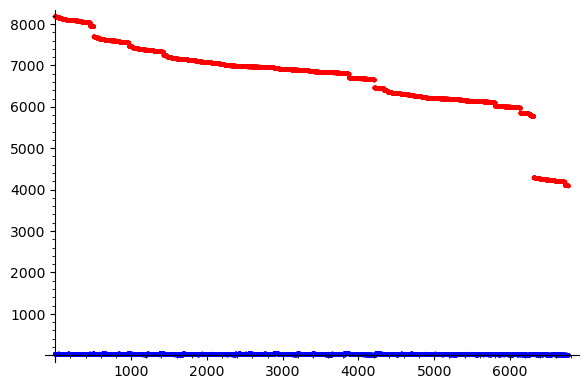

In [231]:
list_plot(L) + list_plot(K, color='red')

In [228]:
K = list(L)

In [241]:
t1 = time()
M = []
print(time_show())
for HH in all_hypergraphs(6, "interval"):
    if Vincent_criterion(HH):
        M.append(to_intervals(HH))
print(time_show())
M = [Set([(h[0]+1, h[1]+1) for h in H]) for H in M]
print(len(M))
print(time() - t1)

0h53
0h54
6771
15.133819103240967


In [203]:
for H in M:
    if not H in L:
        print(H)

{(3, 4), (1, 3), (2, 3), (2, 4)}
{(1, 2), (1, 3), (2, 3), (3, 4), (2, 4)}


True
True


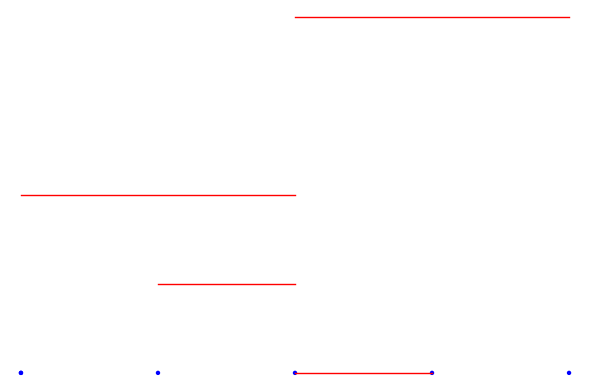

In [11]:
HH = [[0, 1, 2], [2, 3, 4], [1, 2], [2, 3]]
P = hypergraphic_polytope(HH)
print(P.is_combinatorially_isomorphic(polytopes.hypercube(4)))
print(P.is_simple())
draw_interval_hypergraph(HH).show(axes=False)

In [89]:
for n in range(2, 6):
    LL = [[] for _ in range(binomial(n, 2)+1)]
    print("n =", n)
    #print(sum(int(hypergraphic_polytope(HH).is_simple()) for HH in all_hypergraphs(n, "interval") if len(HH) != 0))
    co = 0
    cou = 0
    for HH in all_hypergraphs(n, "interval"):
        if len(HH) != 0:
            co += 1
            b = hypergraphic_polytope(HH).is_simple()
            v = Vincent_criterion(HH)
            if ((not b) and v):
                print(HH, "simple:", b, "; Vincent:", v)
            cou += int(b)
    print(co, cou)
    print()

n = 2
2 0

n = 3
14 0

n = 4
115 0

n = 5
1532 0



In [10]:
for n in range(2, 7):
    LL = [[] for _ in range(binomial(n, 2)+1)]
    print("n =", n)
    #print(sum(int(hypergraphic_polytope(HH).is_simple()) for HH in all_hypergraphs(n, "interval") if len(HH) != 0))
    co = 0
    cou = 0
    for HH in all_hypergraphs(n, "interval"):
        if len(HH) != 0:
            co += 1
            if co % 1000 == 0:
                print(time_show(), co)
            b = hypergraphic_polytope(HH).is_simple()
            v = Vincent_criterion(HH)
            if (b and not v) or ((not b) and v):
                print(HH, "S:", b, "; V:", v)
            cou += int(b)
    print(co, cou)
    print()

n = 2
1 1

n = 3
7 7

n = 4
63 52

n = 5
10h35 1000
1023 509

n = 6
10h35 1000
10h36 2000
10h36 3000
10h36 4000
10h37 5000
10h37 6000
10h38 7000
10h39 8000
10h39 9000
10h40 10000
10h41 11000
10h42 12000
10h43 13000
10h44 14000
10h45 15000
10h46 16000
10h47 17000
10h49 18000
10h50 19000
10h52 20000
10h54 21000
10h57 22000
11h0 23000
11h4 24000
11h8 25000
11h13 26000
11h17 27000
11h22 28000
11h27 29000
11h32 30000
11h39 31000
11h45 32000
32767 6770



In [13]:
for n in range(2, 11):
    LL = [[] for _ in range(binomial(n, 2)+1)]
    print("n =", n)
    co = 0
    cou = 0
    for HH in all_hypergraphs(n, "interval"):
        if len(HH) != 0:
            co += 1
            if co % 250000 == 0:
                print(time_show(), co)
            cou += int(Vincent_criterion(HH))
    print(co, cou)
    print()

n = 2
1 1

n = 3
7 7

n = 4
63 52

n = 5
1023 509

n = 6
32767 6770

n = 7
11h53 250000
11h56 500000
11h58 750000
12h2 1000000
12h5 1250000
12h10 1500000
12h15 1750000
12h21 2000000
2097151 121035

n = 8
12h29 250000
12h34 500000
12h40 750000
12h47 1000000


KeyboardInterrupt: 

In [14]:
co, cou

(1085944, 122606)

n = 2
0

[{0, 1}]


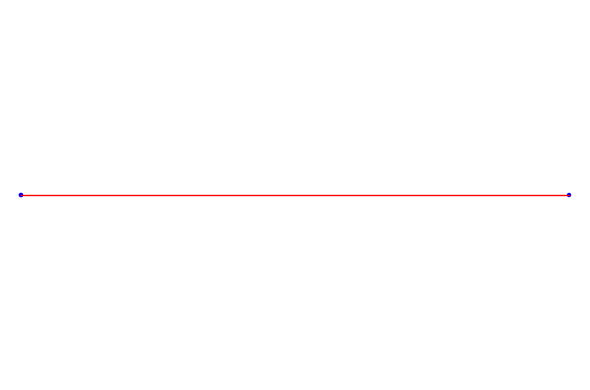

1

1 1

n = 3
0

[{0, 1}]


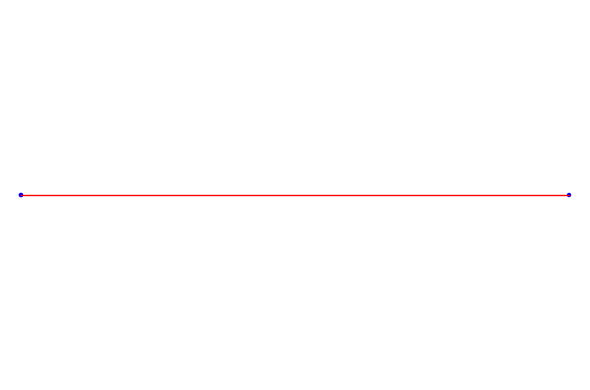

[{0, 1, 2}]


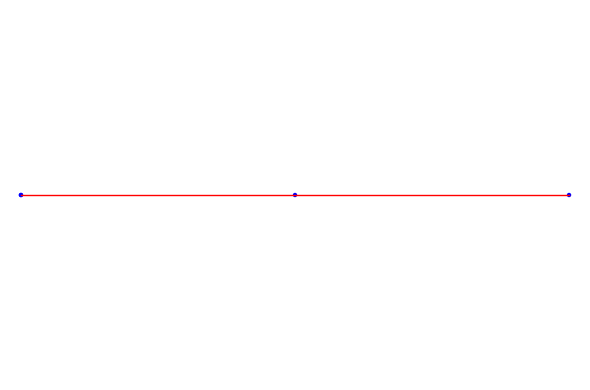

[{1, 2}]


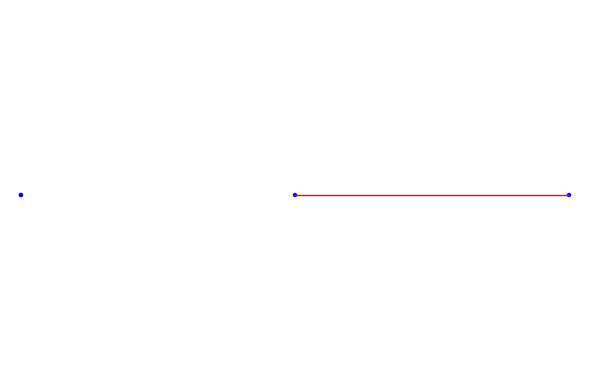

3

[{0, 1}, {0, 1, 2}]


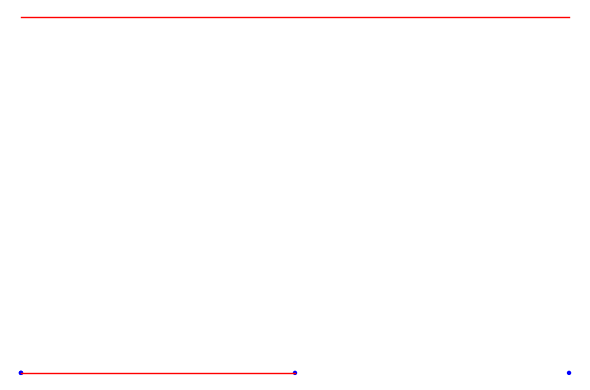

[{0, 1}, {1, 2}]


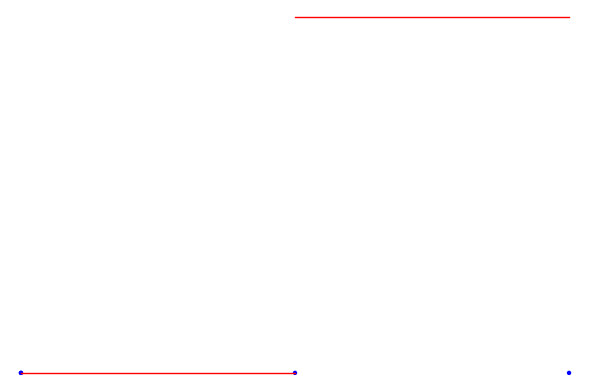

[{1, 2}, {0, 1, 2}]


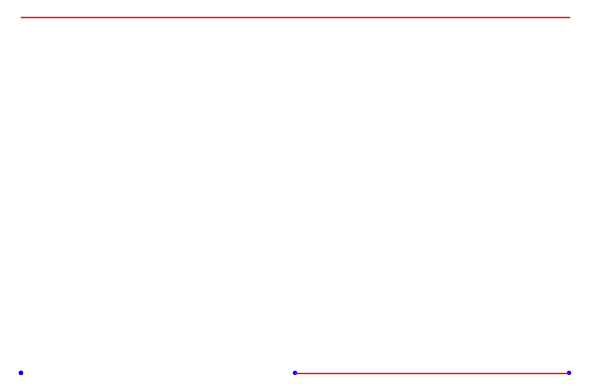

3

[{0, 1}, {1, 2}, {0, 1, 2}]


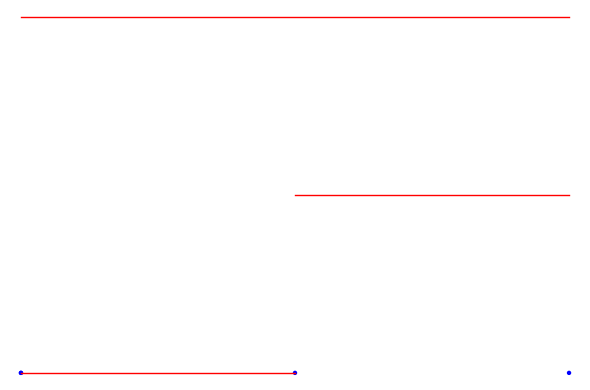

1

7 7

n = 4
0

[{0, 1}]


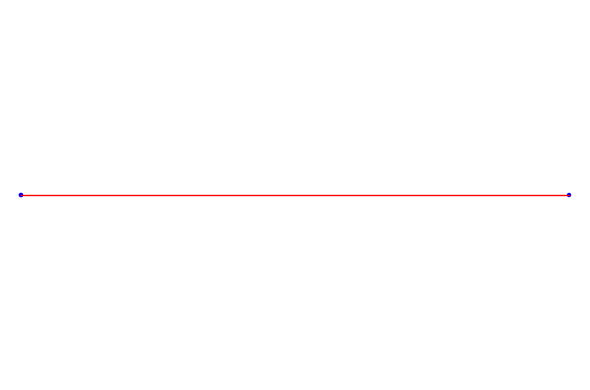

[{0, 1, 2}]


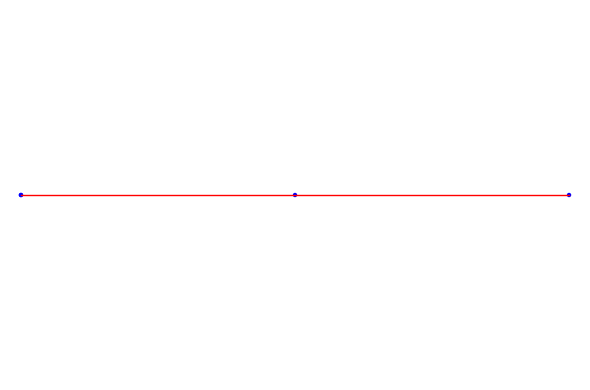

[{0, 1, 2, 3}]


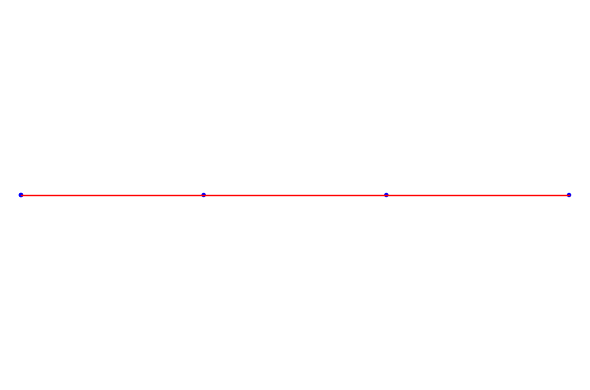

[{1, 2}]


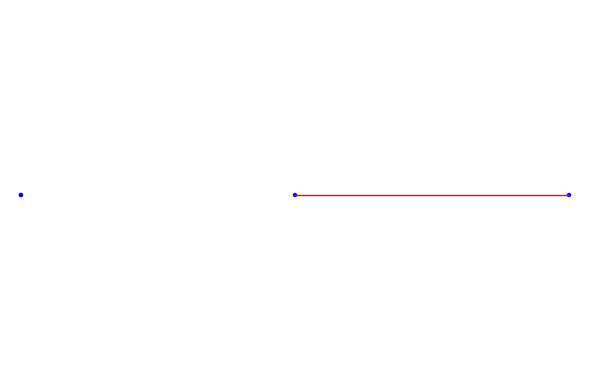

[{1, 2, 3}]


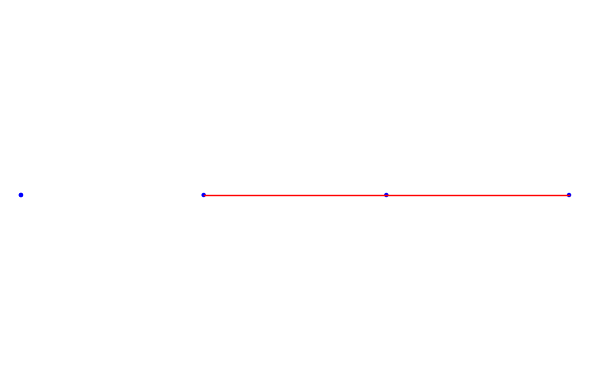

[{2, 3}]


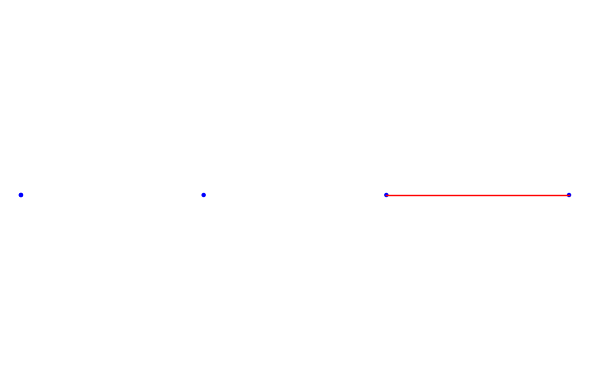

6

[{0, 1}, {0, 1, 2}]


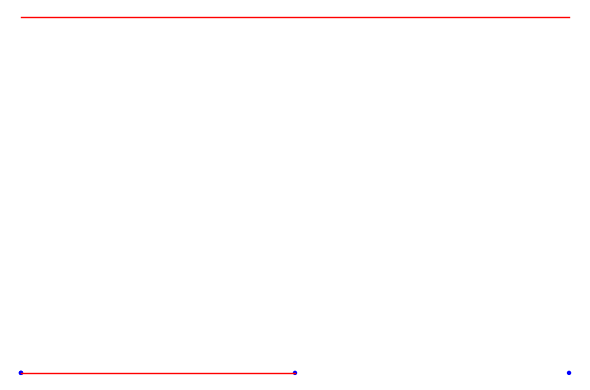

[{0, 1}, {0, 1, 2, 3}]


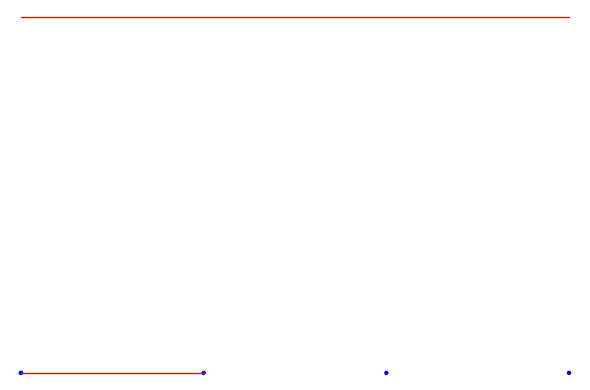

[{0, 1}, {1, 2}]


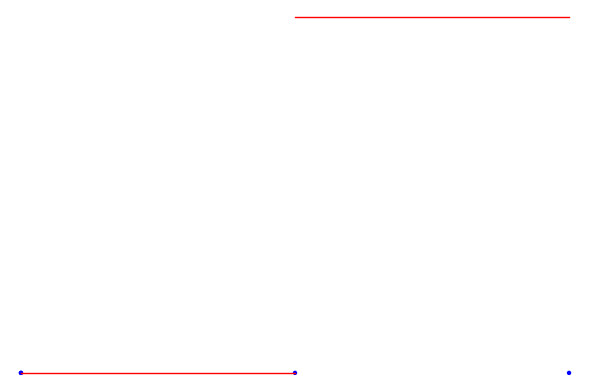

[{1, 2, 3}, {0, 1}]


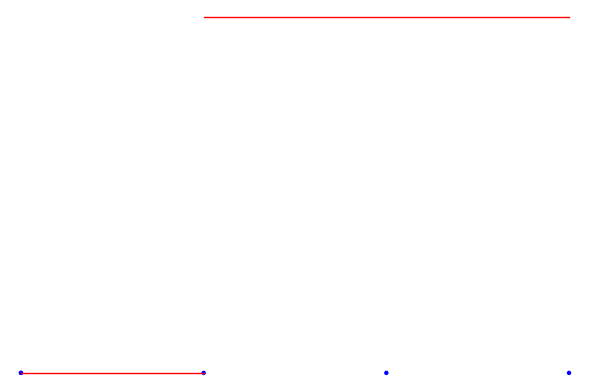

[{0, 1}, {2, 3}]


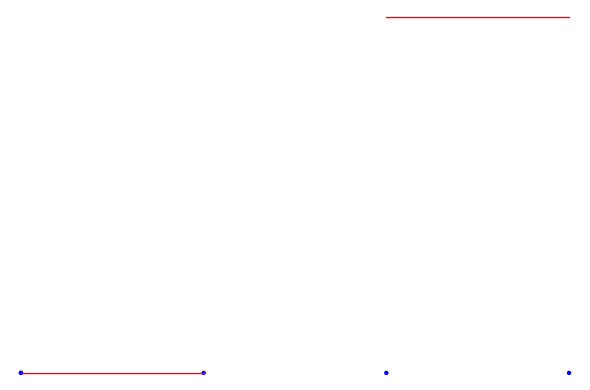

[{0, 1, 2, 3}, {0, 1, 2}]


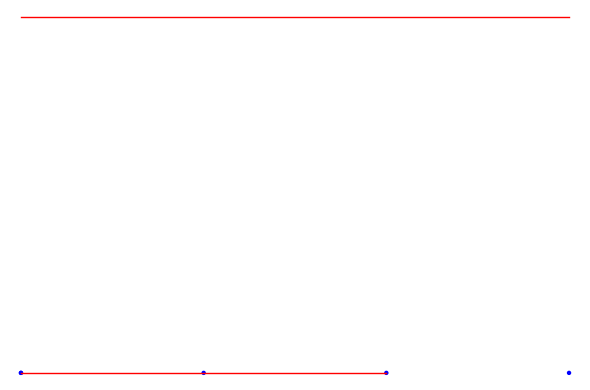

[{1, 2}, {0, 1, 2}]


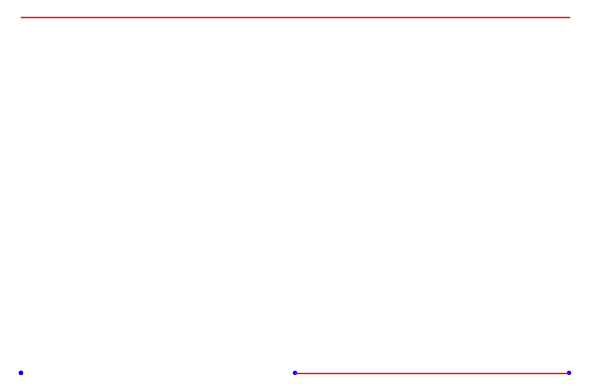

[{2, 3}, {0, 1, 2}]


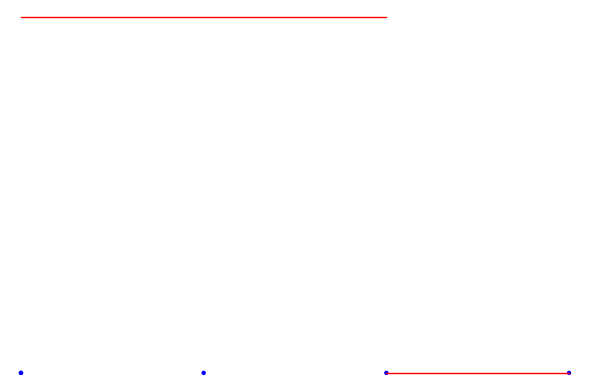

[{0, 1, 2, 3}, {1, 2}]


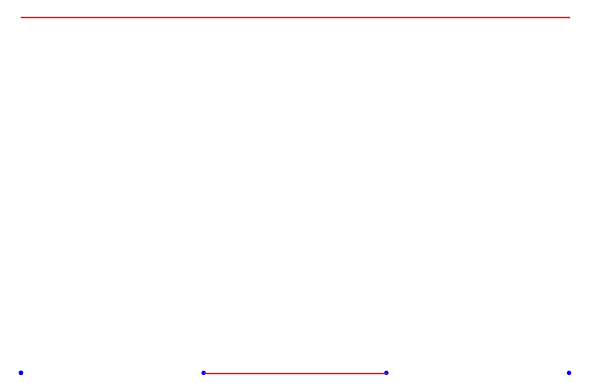

[{1, 2, 3}, {0, 1, 2, 3}]


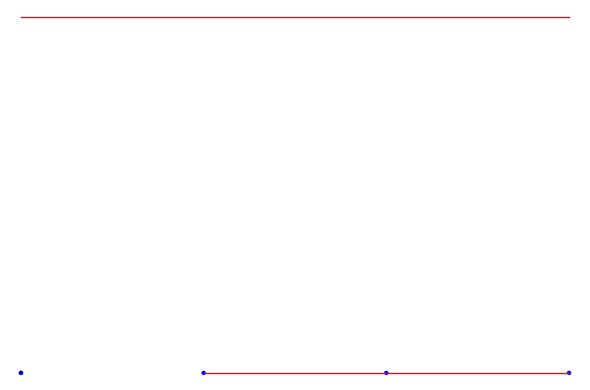

[{0, 1, 2, 3}, {2, 3}]


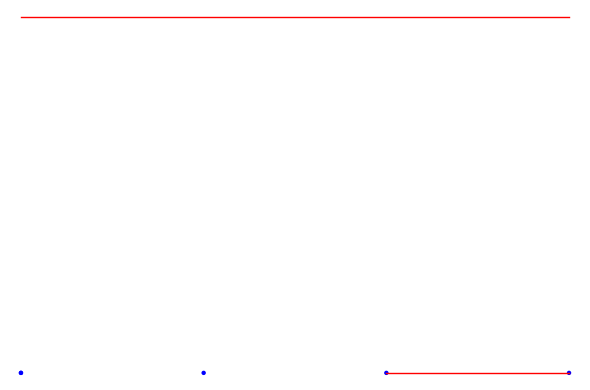

[{1, 2, 3}, {1, 2}]


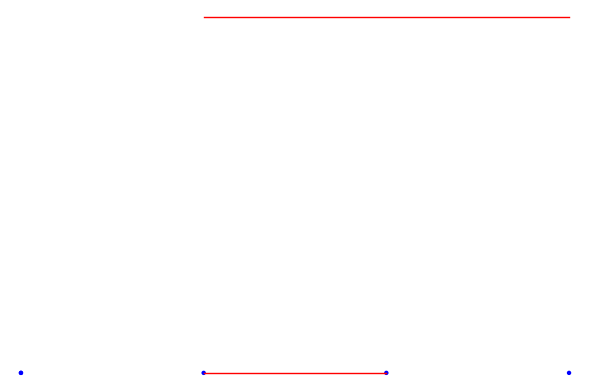

[{2, 3}, {1, 2}]


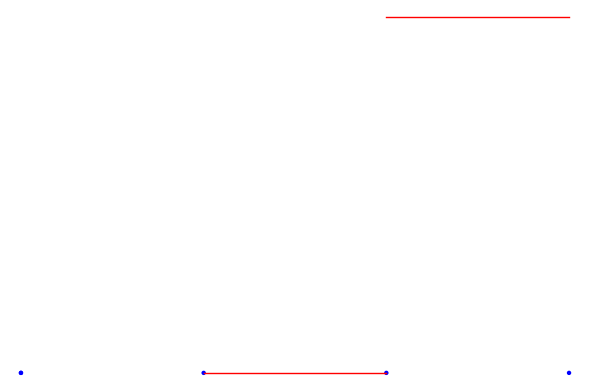

[{1, 2, 3}, {2, 3}]


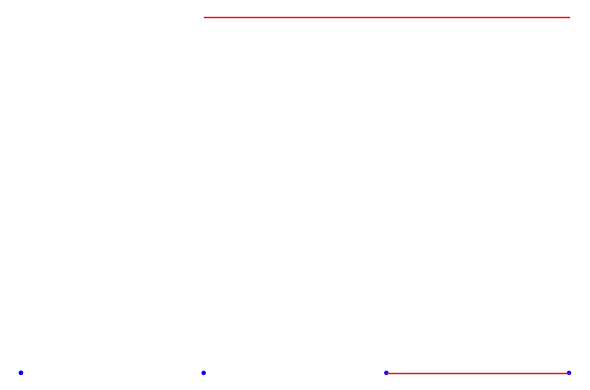

14

[{0, 1}, {0, 1, 2, 3}, {0, 1, 2}]


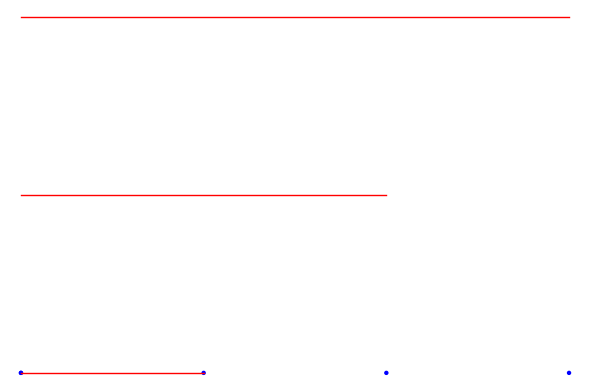

[{0, 1}, {1, 2}, {0, 1, 2}]


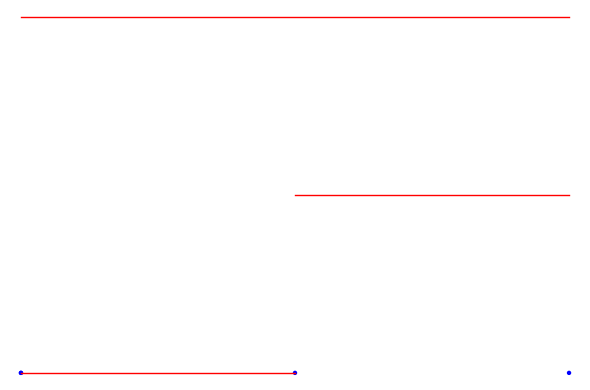

[{0, 1}, {2, 3}, {0, 1, 2}]


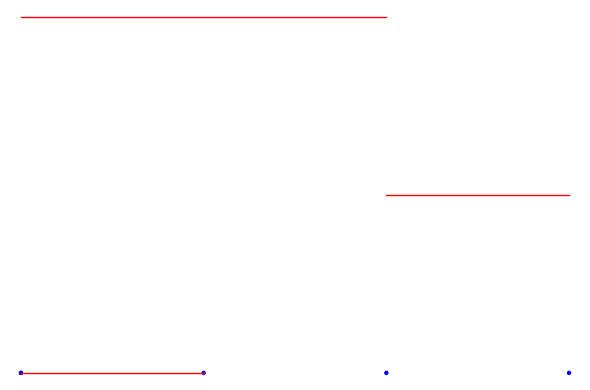

[{1, 2, 3}, {0, 1}, {0, 1, 2, 3}]


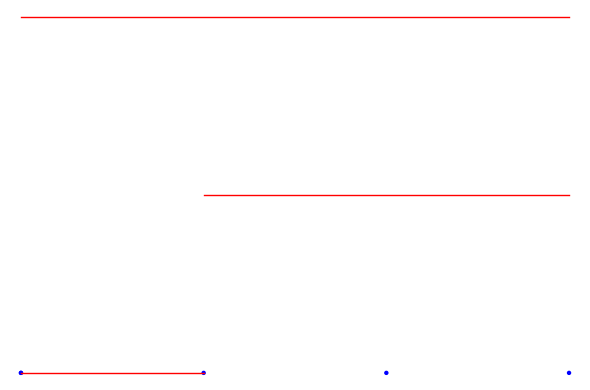

[{0, 1}, {0, 1, 2, 3}, {2, 3}]


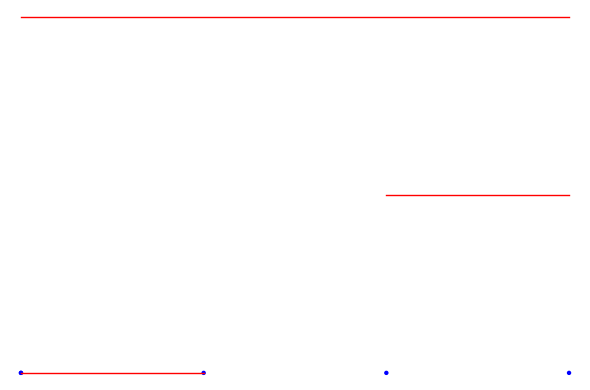

[{1, 2, 3}, {0, 1}, {1, 2}]


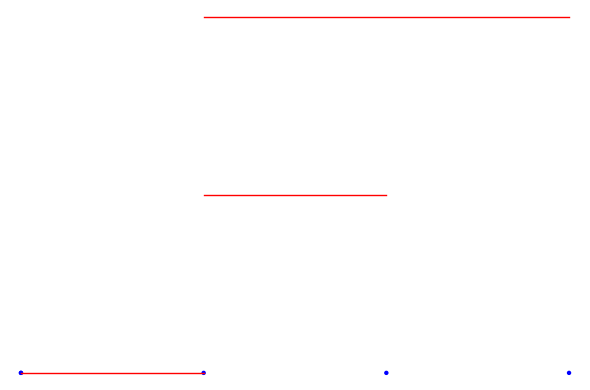

[{0, 1}, {2, 3}, {1, 2}]


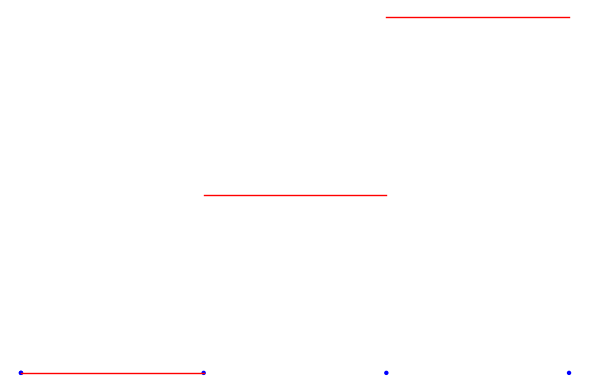

[{1, 2, 3}, {0, 1}, {2, 3}]


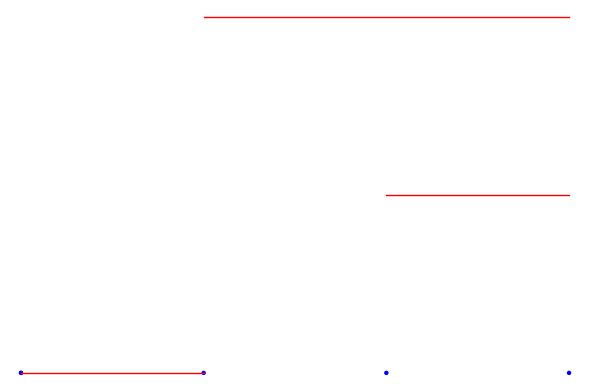

[{1, 2}, {0, 1, 2, 3}, {0, 1, 2}]


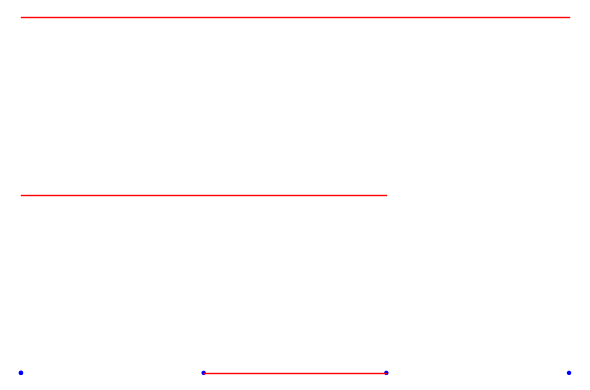

[{1, 2, 3}, {0, 1, 2, 3}, {0, 1, 2}]


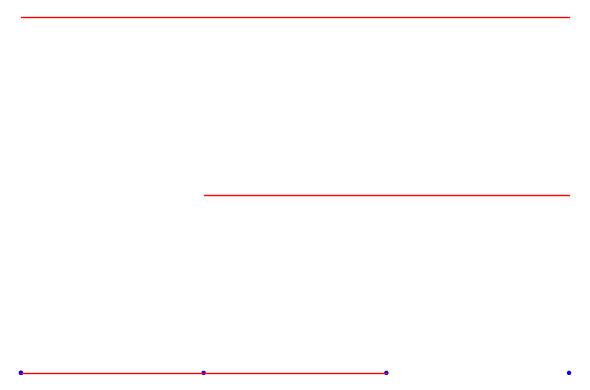

[{0, 1, 2, 3}, {2, 3}, {0, 1, 2}]


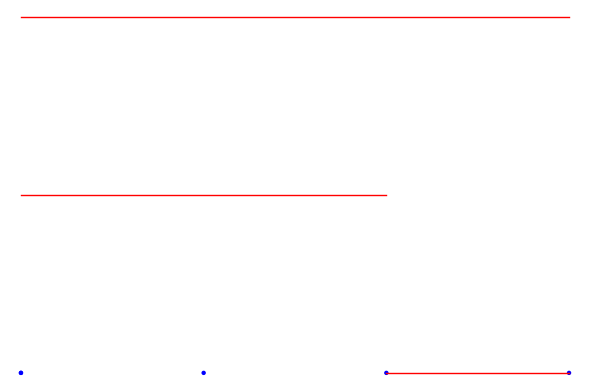

[{1, 2, 3}, {1, 2}, {0, 1, 2}]


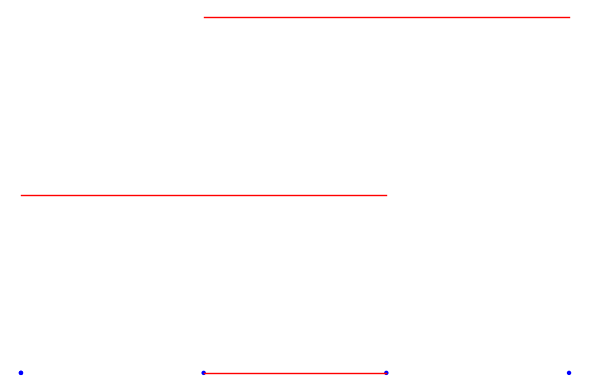

[{1, 2}, {2, 3}, {0, 1, 2}]


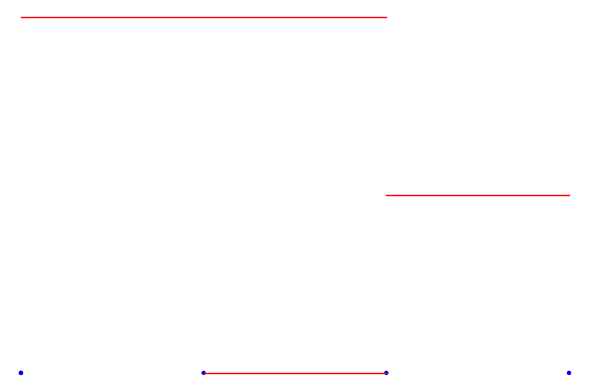

[{1, 2, 3}, {0, 1, 2, 3}, {1, 2}]


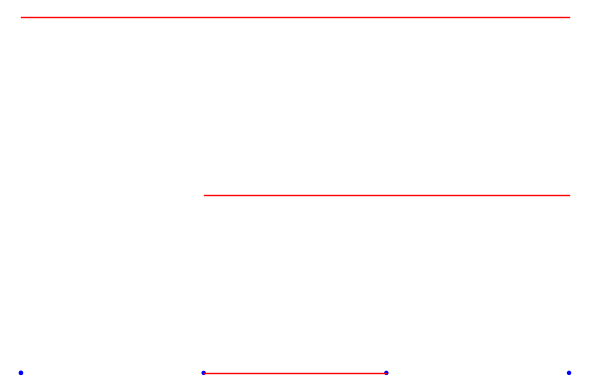

[{1, 2, 3}, {0, 1, 2, 3}, {2, 3}]


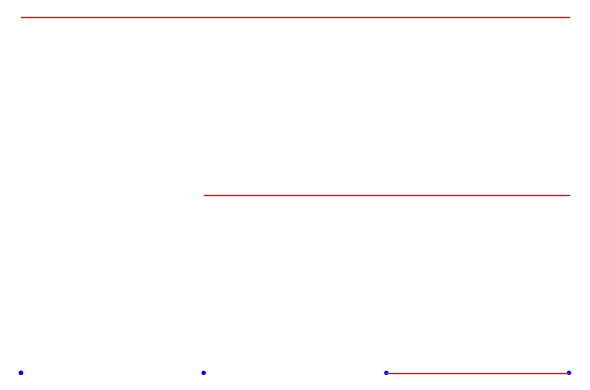

[{1, 2, 3}, {2, 3}, {1, 2}]


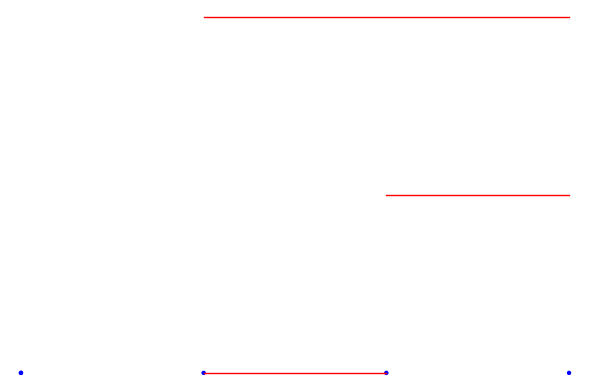

16

[{0, 1}, {1, 2}, {0, 1, 2, 3}, {0, 1, 2}]


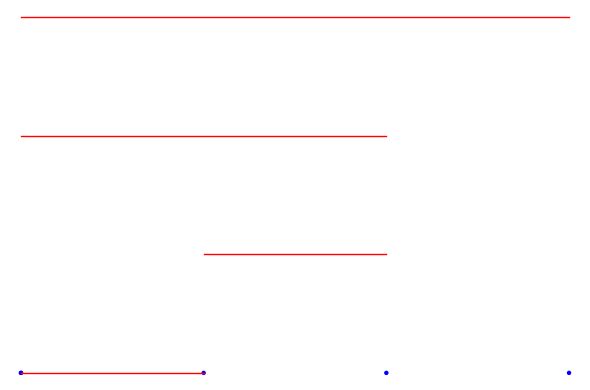

[{1, 2, 3}, {0, 1}, {0, 1, 2, 3}, {0, 1, 2}]


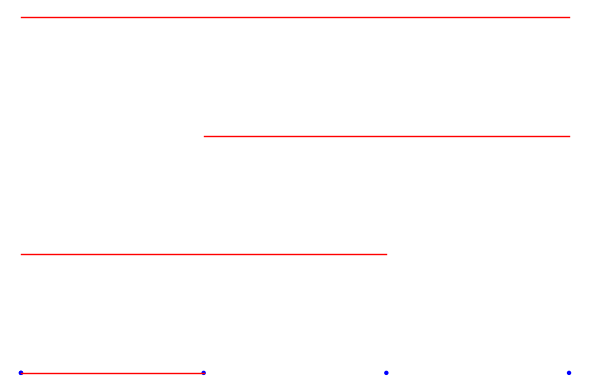

[{0, 1}, {0, 1, 2, 3}, {2, 3}, {0, 1, 2}]


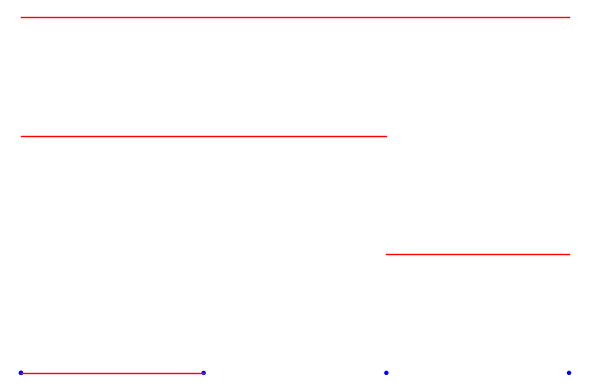

[{1, 2, 3}, {0, 1}, {1, 2}, {0, 1, 2}]


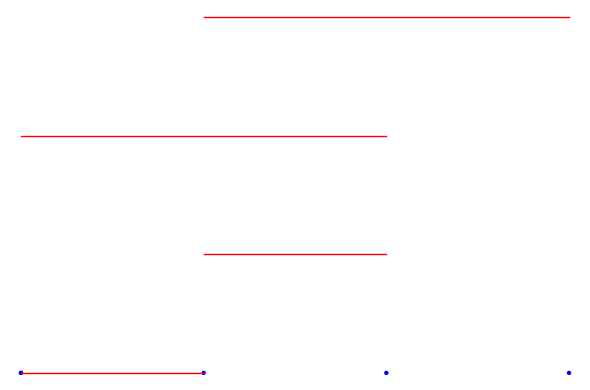

[{0, 1}, {1, 2}, {2, 3}, {0, 1, 2}]


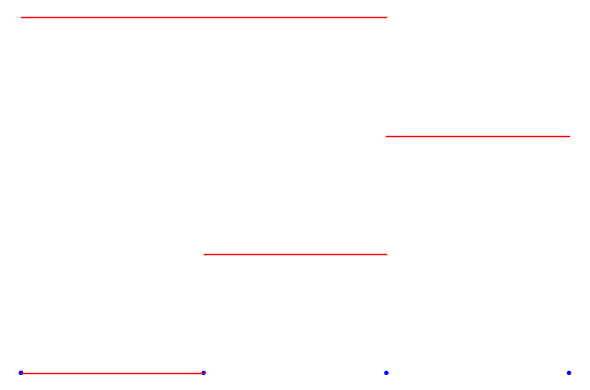

[{1, 2, 3}, {0, 1}, {0, 1, 2, 3}, {2, 3}]


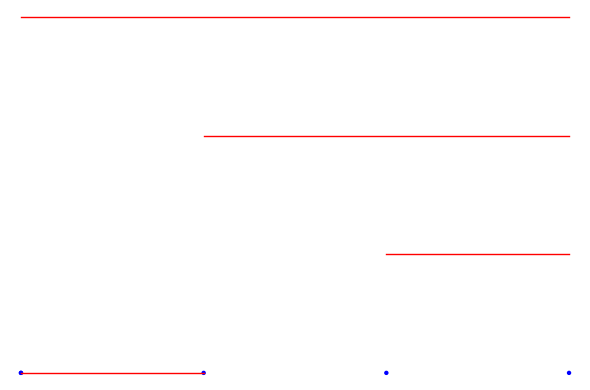

[{1, 2, 3}, {0, 1}, {2, 3}, {1, 2}]


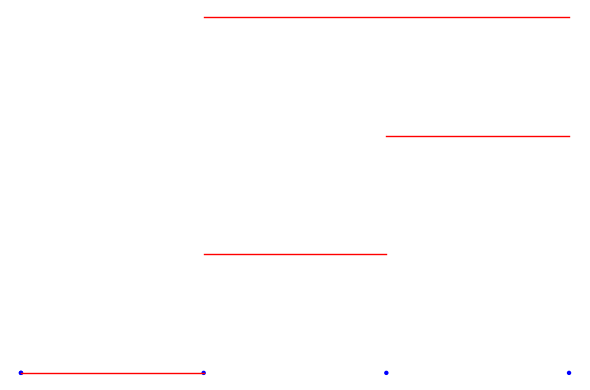

[{1, 2, 3}, {1, 2}, {0, 1, 2, 3}, {0, 1, 2}]


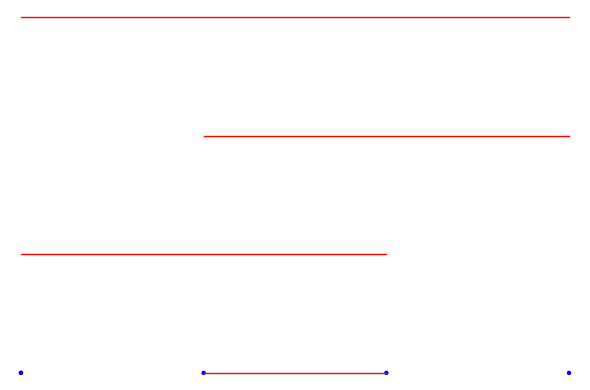

[{1, 2, 3}, {0, 1, 2, 3}, {2, 3}, {0, 1, 2}]


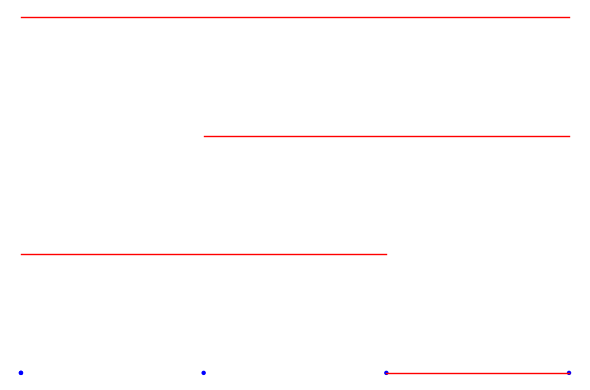

[{1, 2, 3}, {1, 2}, {2, 3}, {0, 1, 2}]


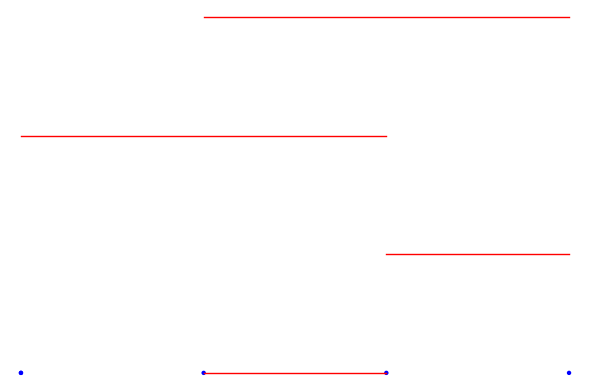

[{1, 2, 3}, {0, 1, 2, 3}, {2, 3}, {1, 2}]


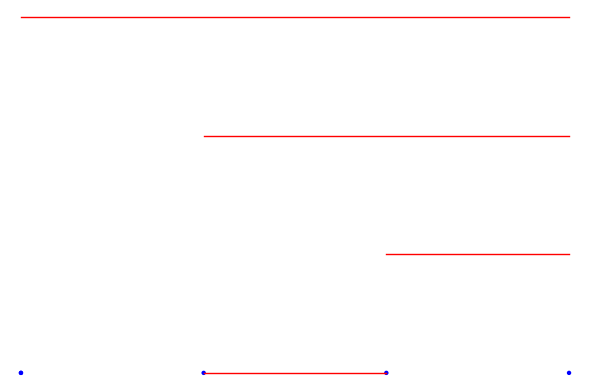

11

[{0, 1, 2, 3}, {0, 1, 2}, {1, 2}, {1, 2, 3}, {0, 1}]


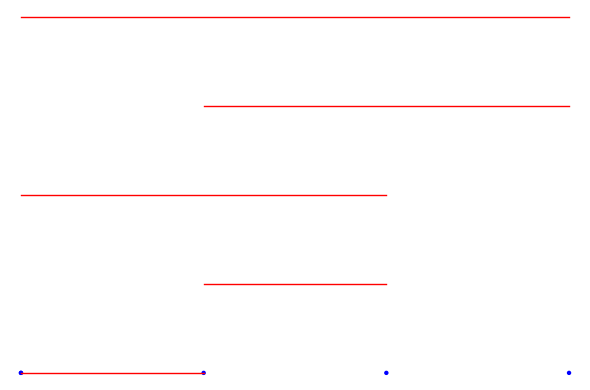

[{0, 1, 2, 3}, {2, 3}, {0, 1, 2}, {1, 2, 3}, {0, 1}]


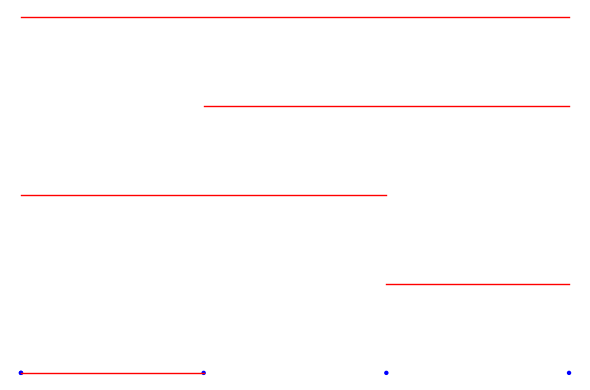

[{2, 3}, {0, 1, 2}, {1, 2}, {1, 2, 3}, {0, 1}]


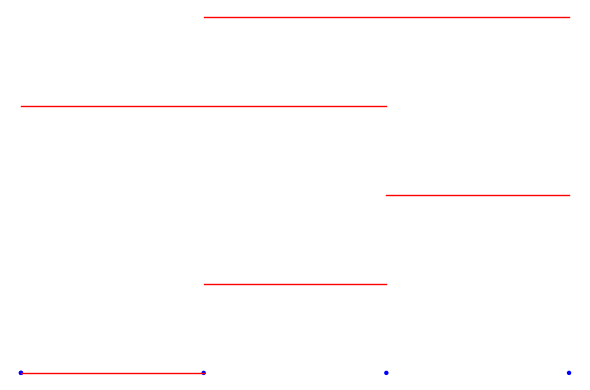

[{0, 1, 2, 3}, {2, 3}, {0, 1, 2}, {1, 2}, {1, 2, 3}]


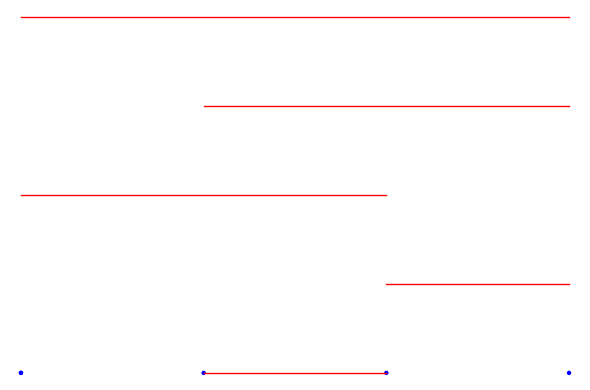

4

[{0, 1, 2, 3}, {2, 3}, {0, 1, 2}, {1, 2}, {1, 2, 3}, {0, 1}]


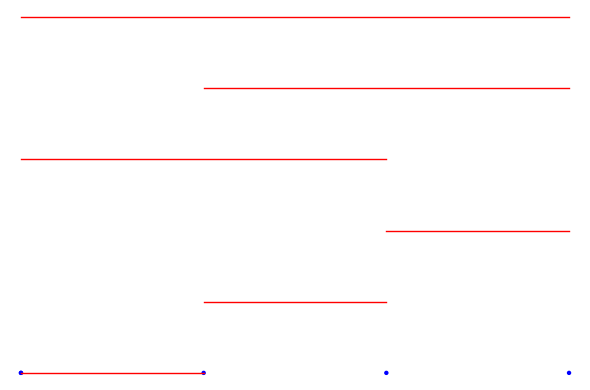

1

63 52



In [37]:
for n in range(2, 5):
    LL = [[] for _ in range(binomial(n, 2)+1)]
    print("n =", n)
    co = 0
    cou = 0
    for HH in all_hypergraphs(n, "interval"):
        if len(HH) != 0:
            co += 1
            if hypergraphic_polytope(HH).is_simple():
                LL[len(HH)].append(list(HH))
                cou += 1
    for L in LL:
        for HH in L:
            print(HH)
            draw_interval_hypergraph(HH, style='').show(axes=False)
        print(len(L))
        print()
    print(co, cou)
    print()

In [63]:
for n in range(4, 5):
    LL = [[] for _ in range(binomial(n, 2)+1)]
    print("n =", n)
    co = 0
    cou = 0
    for HH in all_hypergraphs(n, "interval"):
        if len(HH) != 0:
            co += 1
            if hypergraphic_polytope(HH).is_simple():
                LL[len(HH)].append(list(HH))
                cou += 1
    fi = open("text_with_condition_"+str(n)+".txt", 'w')
    for L in LL:
        for HH in L:
            print(HH)
            if Set([0, 1, 2]) in HH and Set([1, 2, 3]) in HH:
                fi.write(latex_interval_hypergraph(HH, n))
        print(len(L))
        print()
    fi.close()
    print(co, cou)
    print()

n = 4
0

[{0, 1}]
[{0, 1, 2}]
[{0, 1, 2, 3}]
[{1, 2}]
[{1, 2, 3}]
[{2, 3}]
6

[{0, 1}, {0, 1, 2}]
[{0, 1}, {0, 1, 2, 3}]
[{0, 1}, {1, 2}]
[{1, 2, 3}, {0, 1}]
[{0, 1}, {2, 3}]
[{0, 1, 2, 3}, {0, 1, 2}]
[{1, 2}, {0, 1, 2}]
[{2, 3}, {0, 1, 2}]
[{0, 1, 2, 3}, {1, 2}]
[{1, 2, 3}, {0, 1, 2, 3}]
[{0, 1, 2, 3}, {2, 3}]
[{1, 2, 3}, {1, 2}]
[{2, 3}, {1, 2}]
[{1, 2, 3}, {2, 3}]
14

[{0, 1}, {0, 1, 2, 3}, {0, 1, 2}]
[{0, 1}, {1, 2}, {0, 1, 2}]
[{0, 1}, {2, 3}, {0, 1, 2}]
[{1, 2, 3}, {0, 1}, {0, 1, 2, 3}]
[{0, 1}, {0, 1, 2, 3}, {2, 3}]
[{1, 2, 3}, {0, 1}, {1, 2}]
[{0, 1}, {2, 3}, {1, 2}]
[{1, 2, 3}, {0, 1}, {2, 3}]
[{1, 2}, {0, 1, 2, 3}, {0, 1, 2}]
[{1, 2, 3}, {0, 1, 2, 3}, {0, 1, 2}]
[{0, 1, 2, 3}, {2, 3}, {0, 1, 2}]
[{1, 2, 3}, {1, 2}, {0, 1, 2}]
[{1, 2}, {2, 3}, {0, 1, 2}]
[{1, 2, 3}, {0, 1, 2, 3}, {1, 2}]
[{1, 2, 3}, {0, 1, 2, 3}, {2, 3}]
[{1, 2, 3}, {2, 3}, {1, 2}]
16

[{0, 1}, {1, 2}, {0, 1, 2, 3}, {0, 1, 2}]
[{1, 2, 3}, {0, 1}, {0, 1, 2, 3}, {0, 1, 2}]
[{0, 1}, {0, 1, 2, 3}, {2, 3}, {0, 1, 2

In [69]:
for n in range(5, 6):
    LL = [[] for _ in range(binomial(n, 2)+1)]
    print("n =", n)
    co = 0
    cou = 0
    for HH in all_hypergraphs(n, "interval"):
        if len(HH) != 0:
            co += 1
            if hypergraphic_polytope(HH).is_simple():
                LL[len(HH)].append(list(HH))
                cou += 1
    fi = open("text_with_condition_"+str(n)+".txt", 'w')
    for L in LL:
        for HH in L:
            #print(HH)
            if Set([1, 2]) in HH and Set([2, 3]) in HH and any({1, 2, 3}.issubset(set(X)) for X in HH):
                fi.write(latex_interval_hypergraph(HH, n))
                if not Set([1, 2, 3]) in HH:
                    print(HH)
        print(len(L))
        print()
    fi.close()
    print(co, cou)
    print()

n = 5
0

10

40

84

115

112

80

44

18

5

1

1023 509



In [70]:
for n in range(4, 5):
    LL = [[] for _ in range(binomial(n, 2)+1)]
    print("n =", n)
    co = 0
    cou = 0
    for HH in all_hypergraphs(n, "interval"):
        if len(HH) != 0:
            co += 1
            if hypergraphic_polytope(HH).is_simple():
                LL[len(HH)].append(list(HH))
                cou += 1
    fi = open("text_with_condition2_"+str(n)+".txt", 'w')
    for L in LL:
        for HH in L:
            #print(HH)
            if Set([0, 1]) in HH and Set([1, 2]) in HH and any({0, 1, 2}.issubset(set(X)) for X in HH):
                fi.write(latex_interval_hypergraph(HH, n))
                if not Set([0, 1, 2]) in HH:
                    print(HH)
        print(len(L))
        print()
    fi.close()
    print(co, cou)
    print()

n = 4
0

6

14

16

11

4

1

63 52



In [35]:
HH = [{0, 1, 2, 3}, {2, 3}]
normal_form_interval_hypergraph(HH)

[{2, 3}, {0, 1, 2, 3}]

In [12]:
for n in range(2, 6):
    LL = [[] for _ in range(binomial(n, 2)+1)]
    print("n =", n)
    co = 0
    cou = 0
    for HH in all_hypergraphs(n, "interval"):
        if len(HH) != 0:
            co += 1
            if hypergraphic_polytope(HH).is_simple():
                LL[len(HH)].append(list(HH))
                cou += 1
    for L in LL:
        for HH in L:
            print(HH)
        print(len(L))
        print()
    print(co, cou)
    print()

n = 2
0

[{0, 1}]
1

1 1

n = 3
0

[{0, 1}]
[{0, 1, 2}]
[{1, 2}]
3

[{0, 1}, {0, 1, 2}]
[{0, 1}, {1, 2}]
[{1, 2}, {0, 1, 2}]
3

[{0, 1}, {1, 2}, {0, 1, 2}]
1

7 7

n = 4
0

[{0, 1}]
[{0, 1, 2}]
[{0, 1, 2, 3}]
[{1, 2}]
[{1, 2, 3}]
[{2, 3}]
6

[{0, 1}, {0, 1, 2}]
[{0, 1}, {0, 1, 2, 3}]
[{0, 1}, {1, 2}]
[{1, 2, 3}, {0, 1}]
[{0, 1}, {2, 3}]
[{0, 1, 2, 3}, {0, 1, 2}]
[{1, 2}, {0, 1, 2}]
[{2, 3}, {0, 1, 2}]
[{0, 1, 2, 3}, {1, 2}]
[{1, 2, 3}, {0, 1, 2, 3}]
[{0, 1, 2, 3}, {2, 3}]
[{1, 2, 3}, {1, 2}]
[{2, 3}, {1, 2}]
[{1, 2, 3}, {2, 3}]
14

[{0, 1}, {0, 1, 2, 3}, {0, 1, 2}]
[{0, 1}, {1, 2}, {0, 1, 2}]
[{0, 1}, {2, 3}, {0, 1, 2}]
[{1, 2, 3}, {0, 1}, {0, 1, 2, 3}]
[{0, 1}, {0, 1, 2, 3}, {2, 3}]
[{1, 2, 3}, {0, 1}, {1, 2}]
[{0, 1}, {2, 3}, {1, 2}]
[{1, 2, 3}, {0, 1}, {2, 3}]
[{1, 2}, {0, 1, 2, 3}, {0, 1, 2}]
[{1, 2, 3}, {0, 1, 2, 3}, {0, 1, 2}]
[{0, 1, 2, 3}, {2, 3}, {0, 1, 2}]
[{1, 2, 3}, {1, 2}, {0, 1, 2}]
[{1, 2}, {2, 3}, {0, 1, 2}]
[{1, 2, 3}, {0, 1, 2, 3}, {1, 2}]
[{1, 2, 3}, {0, 1, 2, 3}, {2

In [3]:
n = 4
c, co = 0, 0

for HH in all_hypergraphs(n, "all"):
    if len(HH) >= 1:
        c += 1
        if c % 1000 == 0:
            print(c, co)
        P = hypergraphic_polytope(HH, n)
        if not P.is_simple():
            print(HH)
            co += 1
            if co >= 15:
                break
            #print(P.is_simple(), HH)

print()
print(c, co)

{{0, 1, 3}, {0, 1, 2}}
{{0, 2, 3}, {0, 1, 2}}
{{1, 2, 3}, {0, 1, 2}}
{{0, 1, 3}, {0, 2, 3}}
{{1, 2, 3}, {0, 1, 3}}
{{1, 2, 3}, {0, 2, 3}}
{{0, 1, 2}, {0, 1, 3}, {0}}
{{0, 1, 2}, {0, 2, 3}, {0}}
{{1, 2, 3}, {0, 1, 2}, {0}}
{{0, 1, 3}, {0, 2, 3}, {0}}
{{1, 2, 3}, {0, 1, 3}, {0}}
{{1, 2, 3}, {0, 2, 3}, {0}}
{{1}, {0, 1, 3}, {0, 1, 2}}
{{1}, {0, 2, 3}, {0, 1, 2}}
{{1, 2, 3}, {1}, {0, 1, 2}}

282 15


In [41]:
n = 4
c, co = 0, 0

for HH in all_hypergraphs(n, "all"):
    if len(HH) >= 1:
        c += 1
        if c % 1000 == 0:
            print(c, co)
        P = hypergraphic_polytope(HH, n)
        if not P.is_simple():
            co += 1
            #print(P.is_simple(), HH)

print()
print(c, co)

1000 147
2000 452
3000 760
4000 1134
5000 1604
6000 1977
7000 2456
8000 2930
9000 3445
10000 4026
11000 4499
12000 5017
13000 5606
14000 6163
15000 6772
16000 7410
17000 7962
18000 8560
19000 9163
20000 9802
21000 10424
22000 11040
23000 11654
24000 12276
25000 12894
26000 13519
27000 14115
28000 14677
29000 15272
30000 15819
31000 16293
32000 16722

32767 16896


In [4]:
n = 4
for H in all_hypergraphs(n):
    if len(H) >= 2:
        P = hypergraphic_polytope(H)
        if not P.is_simple():
            print(H)
            P.show()
            break

{{0, 1, 3}, {0, 1, 2}}


Graphics3d Object

In [2]:
def neighbors(H, u, as_vertex_and_hyperedge=False):
    for X in H:
        if u in X:
            for w in X:
                if not w == u:
                    if as_vertex_and_hyperedge:
                        yield (w, X)
                    else:
                        yield w

def paths(H, u, v):
    front = [([u], [], [])]
    while len(front) != 0:
        PV, PE, seen = front.pop(0)
        if PV[-1] == v:
            yield PV, PE
        else:
            for w, X in neighbors(H, PV[-1], as_vertex_and_hyperedge=True):
                if not X in seen:
                    front.append((list(PV) + [w], list(PE) + [X], list(seen) + [X]))
    return None

def are_connected(H, u, v):
    return any(u in X and v in X for X in H)

def have_two_disjoint_paths(H, u, v, certificate=False):
    Seen = []
    for PV, PE in paths(H, u, v):
        V = Set([x for X in PE[1:-1] for x in X ])
        Seen.append(V)
        for i in range(len(Seen)):
            if len(Seen[i].intersection(V)) == 0:
                if certificate:
                    return True, (Seen[i], V)
                return True
    return False

In [40]:
for nei in neighbors(H, 2, as_vertex_and_hyperedge=True):
    print(nei)

(0, {0, 1, 2})
(1, {0, 1, 2})


In [56]:
for pa in paths(H, 2, 5):
    print(pa)

([2, 0, 4, 5], [{0, 1, 2}, {0, 1, 4}, {3, 4, 5}])
([2, 1, 4, 5], [{0, 1, 2}, {0, 1, 4}, {3, 4, 5}])
([2, 1, 3, 5], [{0, 1, 2}, {1, 3}, {3, 4, 5}])
([2, 0, 1, 3, 5], [{0, 1, 2}, {0, 1, 4}, {1, 3}, {3, 4, 5}])


In [55]:
H = Set({Set({0, 1, 2}), Set({3, 4, 5}), Set({1, 3}), Set({0, 1, 4})})

have_two_disjoint_paths(H, 2, 5, certificate=True)

False

In [19]:
n = 3
c, co = 0, 0
m = 0
DD = [[] for _ in range(n*(n-1)/2+1)]

for HH in all_hypergraphs(n, "no_singleton"):
    if len(HH) >= 1:
        c += 1
        if c % 1000 == 0:
            print(c, co)
        P = hypergraphic_polytope(HH, n)
        dia = P.graph().diameter()
        DD[dia].append(HH)
print()
print(c, co)
print()
for k in range(n*(n-1)/2+1):
    print("diameter :", k)
    for HH in DD[k]:
        print(HH)
    print()


15 0

diameter : 0

diameter : 1
{{0, 1}}
{{0, 2}}
{{1, 2}}
{{0, 1, 2}}

diameter : 2
{{0, 1}, {0, 2}}
{{0, 1}, {1, 2}}
{{0, 1}, {0, 1, 2}}
{{0, 2}, {1, 2}}
{{0, 2}, {0, 1, 2}}
{{0, 1, 2}, {1, 2}}
{{0, 1}, {0, 2}, {0, 1, 2}}
{{0, 1, 2}, {0, 1}, {1, 2}}
{{0, 1, 2}, {0, 2}, {1, 2}}

diameter : 3
{{0, 1}, {0, 2}, {1, 2}}
{{0, 1, 2}, {0, 1}, {0, 2}, {1, 2}}



In [20]:
n = 4
c, co = 0, 0
m = 0
DD = [[] for _ in range(n*(n-1)/2+1)]

for HH in all_hypergraphs(n, "no_singleton"):
    if len(HH) >= 1:
        c += 1
        if c % 1000 == 0:
            print(c, co)
        P = hypergraphic_polytope(HH, n)
        dia = P.graph().diameter()
        DD[dia].append(HH)
print()
print(c, co)
print()
for k in range(n*(n-1)/2+1):
    print("diameter :", k)
    for HH in DD[k]:
        print(HH)
    print()

1000 0
2000 0

2047 0

diameter : 0

diameter : 1
{{0, 1}}
{{0, 2}}
{{0, 3}}
{{1, 2}}
{{1, 3}}
{{2, 3}}
{{0, 1, 2}}
{{0, 1, 3}}
{{0, 2, 3}}
{{1, 2, 3}}
{{0, 1, 2, 3}}

diameter : 2
{{0, 1}, {0, 2}}
{{0, 1}, {0, 3}}
{{0, 1}, {1, 2}}
{{0, 1}, {1, 3}}
{{0, 1}, {2, 3}}
{{0, 1}, {0, 1, 2}}
{{0, 1}, {0, 1, 3}}
{{0, 1}, {0, 2, 3}}
{{1, 2, 3}, {0, 1}}
{{0, 1}, {0, 1, 2, 3}}
{{0, 2}, {0, 3}}
{{0, 2}, {1, 2}}
{{0, 2}, {1, 3}}
{{0, 2}, {2, 3}}
{{0, 2}, {0, 1, 2}}
{{0, 2}, {0, 1, 3}}
{{0, 2}, {0, 2, 3}}
{{1, 2, 3}, {0, 2}}
{{0, 2}, {0, 1, 2, 3}}
{{1, 2}, {0, 3}}
{{1, 3}, {0, 3}}
{{2, 3}, {0, 3}}
{{0, 1, 2}, {0, 3}}
{{0, 1, 3}, {0, 3}}
{{0, 2, 3}, {0, 3}}
{{1, 2, 3}, {0, 3}}
{{0, 1, 2, 3}, {0, 3}}
{{1, 3}, {1, 2}}
{{2, 3}, {1, 2}}
{{0, 1, 2}, {1, 2}}
{{0, 1, 3}, {1, 2}}
{{0, 2, 3}, {1, 2}}
{{1, 2, 3}, {1, 2}}
{{0, 1, 2, 3}, {1, 2}}
{{1, 3}, {2, 3}}
{{1, 3}, {0, 1, 2}}
{{0, 1, 3}, {1, 3}}
{{1, 3}, {0, 2, 3}}
{{1, 2, 3}, {1, 3}}
{{1, 3}, {0, 1, 2, 3}}
{{2, 3}, {0, 1, 2}}
{{0, 1, 3}, {2, 3}}
{{0, 2, 3

Graphics3d Object

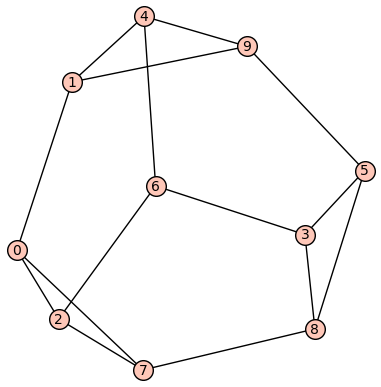

In [24]:
HH = ((0, 1, 2), (1, 2, 3), (0, 1, 3))
P = hypergraphic_polytope(HH, 4)
P.show()
G = P.graph()
G.relabel()
G.show()

In [8]:
n = 4
c, co = 0, 0
m = n*(n-1)/2

for HH in all_hypergraphs(n, "all"):
    if len(HH) >= 1:
        c += 1
        if c % 1000 == 0:
            print(c, co)
        P = hypergraphic_polytope(HH, n)
        dia = P.graph().diameter()
        if dia > m:
            print(dia, HH)
            m = dia
print()
print(c, co)

1 {{0, 1}}
2 {{0, 1}, {0, 2}}
3 {{0, 1}, {0, 2}, {0, 3}}
1000 0
4 {{0, 1}, {0, 2}, {1, 2}, {0, 3}}
2000 0
3000 0
4000 0
5 {{1, 2}, {0, 3}, {0, 1}, {0, 2}, {1, 3}}
5000 0
6000 0
7000 0
8000 0
9000 0
6 {{2, 3}, {1, 2}, {0, 3}, {0, 1}, {0, 2}, {1, 3}}
10000 0
11000 0
12000 0
13000 0
14000 0
15000 0
16000 0
17000 0
18000 0
19000 0
20000 0
21000 0
22000 0
23000 0
24000 0
25000 0
26000 0
27000 0
28000 0
29000 0
30000 0
31000 0
32000 0

32767 0


In [12]:
n = 5
c, co = 0, 0
m = n*(n-1)/2

for HH in all_hypergraphs(n, "all"):
    if len(HH) >= 1:
        c += 1
        if c % 1000 == 0:
            print(c, co)
        P = hypergraphic_polytope(HH, n)
        dia = P.graph().diameter()
        if dia > m:
            print(dia, HH)
            m = dia
print()
print(c, co)

KeyboardInterrupt: 

In [11]:
for n in range(2, 9):
    P = polytopes.permutahedron(n)
    print(n, P.graph().diameter(), n*(n-1)/2)

2 1 1
3 3 3
4 6 6
5 10 10
6 15 15
7 21 21


KeyboardInterrupt: 

In [33]:
G = Graph()
G.hamiltonian_path